# Desmosomes and their distances to various organelles

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.lines import Line2D

## Journal wants a sans serif font
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

## Make exported plots' text seen as text in Illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

NANOMETERS_IN_METERS = 1e9

## For plotting
colormap = "Accent" # With the three chosen colors, greyscale equivalent looks good
plots_dir = "../plots/"

zoomed_out_min = -50
zoomed_out_max = 1050

zoomed_in_min  = -50
zoomed_in_max  = 350

zoomed_out_name  = f"_organelle-distances_{zoomed_out_max}nm"
zoomed_in_name   = f"_organelle-distances_{zoomed_in_max}nm"

In [2]:
dsm_2_dict = {"csv_file"         : "../csv/2023-01-21_DSM-2_WG_filtered_distances_with_N_radial_KRT.csv",
              "voxel_size_in_nm" : 8,
              "name"             : "DSM-2",
              "markerscale"      : 4000,
              "titles"           : ['Endoplasmic Reticulum','Keratin', 'Endosomes'],
              "ER-A"             : "Min Intensity (Distance_ER-A)",
              "ER-B"             : "Min Intensity (Distance_ER-B)",
              "KRT-A"            : "Min Intensity (Distance_KRT-A)",
              "KRT-B"            : "Min Intensity (Distance_KRT-B)",
              "endo-A"           : "Min Intensity (Distance_endo-A)",
              "endo-B"           : "Min Intensity (Distance_endo-B)",
             }

dsm_3_dict = {"csv_file"         : "../csv/2023-01-21_DSM-3_tile2-2_filtered_distances_with_N_radial_KRT.csv",
              "voxel_size_in_nm" : 4,
              "name"             : "DSM-3",
              "markerscale"      : 4000,
              "titles"           : ['Endoplasmic Reticulum','Keratin', 'Microtubules', 'Endosomes'],
              "ER-A"             : "Min Intensity (Distance_Map-ER_R)",
              "ER-B"             : "Min Intensity (Distance_Map-ER_L)",
              "KRT-A"            : "Min Intensity (Distance_Map-KRT_R)",
              "KRT-B"            : "Min Intensity (Distance_Map-KRT_L)",
              "MT-A"             : "Min Intensity (Distance_Map-MT_R)",
              "MT-B"             : "Min Intensity (Distance_Map-MT_L)",
              "endo-A"           : "Min Intensity (Distance_Map-endo_R)",
              "endo-B"           : "Min Intensity (Distance_Map-endo_L)",
             }

In [3]:
def prepare_for_plotting(dsm_dict):
    
    voxel_size_in_nm = dsm_dict["voxel_size_in_nm"]
    
    if dsm_dict["name"] == "DSM-2":
        read_cols = ["Label Index",
                     "Name",
                     "N-sides-with-radial-keratin-filaments",
                     "Volume (nm³)",
                     "Min Intensity (Distance_ER-A)",
                     "Min Intensity (Distance_ER-B)",
                     "Min Intensity (Distance_KRT-A)",
                     "Min Intensity (Distance_KRT-B)",
                     "Min Intensity (Distance_endo-A)",
                     "Min Intensity (Distance_endo-B)"
                    ]
        
    elif dsm_dict["name"] == "DSM-3":
        read_cols = ["Label Index",
                     "Name",
                     "N-sides-with-radial-keratin-filaments",
                     "Volume (nm³)",
                     "Min Intensity (Distance_Map-ER_R)",
                     "Min Intensity (Distance_Map-ER_L)",
                     "Min Intensity (Distance_Map-KRT_R)",
                     "Min Intensity (Distance_Map-KRT_L)",
                     "Min Intensity (Distance_Map-MT_R)",
                     "Min Intensity (Distance_Map-MT_L)",
                     "Min Intensity (Distance_Map-endo_R)",
                     "Min Intensity (Distance_Map-endo_L)"
                    ]
        
    
    df = pd.read_csv(dsm_dict["csv_file"],
                 usecols = read_cols
                )
    distance_columns = list(df.filter(regex = '^Min'))
    
    for col in distance_columns:
        df[col] = df[col] * NANOMETERS_IN_METERS
    
    df.rename(columns = {"Label Index" : "Desmosome",
                     dsm_dict["ER-A"]   : "Distance_to_ER-A [nm]",
                     dsm_dict["ER-B"]   : "Distance_to_ER-B [nm]",
                     dsm_dict["KRT-A"]  : "Distance_to_KRT-A [nm]",
                     dsm_dict["KRT-B"]  : "Distance_to_KRT-B [nm]",
                     dsm_dict["endo-A"] : "Distance_to_endo-A [nm]",
                     dsm_dict["endo-B"] : "Distance_to_endo-B [nm]",
                    },
          inplace = True
         )
    
    if dsm_dict["name"] == "DSM-2":        
        A_data = np.array([df["Distance_to_ER-A [nm]"].values,
                           df["Distance_to_KRT-A [nm]"].values,
                           df["Distance_to_endo-A [nm]"].values,
                          ]) - voxel_size_in_nm

        B_data = np.array([df["Distance_to_ER-B [nm]"].values,
                           df["Distance_to_KRT-B [nm]"].values,
                           df["Distance_to_endo-B [nm]"].values,
                          ]) - voxel_size_in_nm
    
    elif dsm_dict["name"] == "DSM-3":
        df.rename(columns = {
            dsm_dict["MT-A"]  : "Distance_to_MT-A [nm]",
            dsm_dict["MT-B"]  : "Distance_to_MT-B [nm]",
        },
                  inplace = True
                 )
        
        A_data = np.array([df["Distance_to_ER-A [nm]"].values,
                           df["Distance_to_KRT-A [nm]"].values,
                           df["Distance_to_MT-A [nm]"].values,
                           df["Distance_to_endo-A [nm]"].values,
                          ]) - voxel_size_in_nm

        B_data = np.array([df["Distance_to_ER-B [nm]"].values,
                           df["Distance_to_KRT-B [nm]"].values,
                           df["Distance_to_MT-B [nm]"].values,
                           df["Distance_to_endo-B [nm]"].values,
                          ]) - voxel_size_in_nm

    # Empirically determine what looks nice
    dsm_volume_markersizes = df["Volume (nm³)"].values / dsm_dict["markerscale"]
    
    return df, A_data, B_data, dsm_volume_markersizes

def closestContactScatterPlot(x, y,
                              markersizes,
                              color_list,
                              colormap,
                              title,
                              ax_lim_min = 0,
                              ax_lim_max = 2000,
                              ax = None,
                              #want_contact_lines = False,
                             ):
    if ax is None:
        fig, ax = plt.subplots()
    
    
    # Choose filled markers if you want to set edgecolors
    #markers = ["o", "v", "^", "<", ">", "s", "d", "*", "P", "X","8","p","h","H","D"]
    marker_choice = {"0":"o", "1":"s", "2":"^"}
    #o is circle, s is square, ^ is a triangle
    
    cmap = plt.cm.get_cmap(colormap, 3)
    norm = matplotlib.colors.BoundaryNorm(np.arange(-0.5, 3.5, 1), cmap.N)
    
    matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
      
    # Loop over individual points (desmosomes) because markers aren't iterable (yet?)
    for (i, _) in enumerate(x):
        
        # Use the following properties to add flavor
        # Color  : How many sides {0, 1, 2} have radial keratin filaments 
        # Size   : Scaled by volume of desmosome
        # Marker : How many sides {0, 1, 2} have radial keratin filaments
        
        ax.scatter(x[i], y[i],
                   #marker = markers[i],
                   marker = marker_choice[str(color_list[i])],
                   s = markersizes[i],
                   c = color_list[i],
                   cmap = cmap,
                   alpha = 0.4,
                   vmin = 0,
                   vmax = 2,
                   edgecolors='black'
              )
        
        # Explicitly mark where the datapoint actually is
        ax.scatter(x[i], y[i], marker = ".", c = 'black')
    
    # tweak axes
    ax_fontsize = 14
    ax_ticksize = 12
    
    ax.set_xlim([ax_lim_min, ax_lim_max])
    ax.set_xlabel("Closest in Cell A [nm]", fontsize=ax_fontsize)
    
    ax.set_ylim([ax_lim_min, ax_lim_max])
    ax.set_ylabel("Closest in Cell B [nm]", fontsize=ax_fontsize)
    ax.set_title(title, fontsize=ax_fontsize)
    ax.legend([], [])
    
    ax.tick_params(axis='x', labelsize=ax_ticksize)
    ax.tick_params(axis='y', labelsize=ax_ticksize)
    
    return None

def createFigure(R_data, L_data, N_sides_with_radial_keratin,
                 ax_lim_min, ax_lim_max, colormap,
                 plot_dir, plot_name, titles, dsm_volume_markersizes
                ):
    fig, axes = plt.subplots(1, 4, figsize=(40,8), subplot_kw=dict(box_aspect=1), constrained_layout=True)
    #fig, axes = plt.subplots(1, len(R_data), figsize=(40,8))
    ax = axes.ravel()
    
    data_zip = zip(R_data, L_data)
    
    
    # Loop over different organelles (ER, keratin, microtubules, endosomes)
    for i, (r, l) in enumerate(data_zip):
        closestContactScatterPlot(r, l, dsm_volume_markersizes, N_sides_with_radial_keratin,
                                  colormap, titles[i], ax_lim_min, ax_lim_max, ax[i],
                                 )
    
    # The number of sides (of a desmosome) with radial keratin filaments are {0, 1, 2}
    # We'll use color and shape (marker) to show.
    
    N_colors = 3
    
    cmap = plt.cm.get_cmap(colormap, N_colors)
    norm = matplotlib.colors.BoundaryNorm(np.arange(-0.5, N_colors + 0.5, 1), cmap.N)
    
    legend_elements = [Line2D([0], [0],linestyle="None", marker="o", color=cmap(0),
                         label = "0"),
                       Line2D([0], [1],linestyle="None", marker="s", color=cmap(1),
                         label = "1"),
                       Line2D([0], [2],linestyle="None", marker="^", color=cmap(2),
                         label = "2")
                      ]
    
    #fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
    #             ax=ax[-1], ticks=np.arange(0, N_colors + 1),
    #             shrink=0.8, fraction=0.055, pad=0.04, aspect = 5,
    #            label="Number of desmosome sides with radial keratin filaments")

    #legend_elements = [Line2D([0], [0], color= matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)[0], marker="o"),
    #               Line2D([0], [0], marker="s"),
    #               Line2D([0], [0], marker="^")
    #              ]
    
    plt.legend(handles = legend_elements, 
               title = "Number of desmosome sides with radial keratin filaments",
               title_fontsize = 10,
               fontsize = 8,
              )
    
    if "DSM-2" in plot_name:
        ax[-1].axis('off') # Hide the fake ax that was created just to hold the colorbar
    
    plt.savefig(plot_dir + plot_name + ".pdf")
    plt.savefig(plot_dir + plot_name + "_transparent" + ".pdf", transparent = True)

In [4]:
def do_it_all(dsm_dict):
    df, A_data, B_data, dsm_volume_markersizes = prepare_for_plotting(dsm_dict)

    # Zoomed out
    createFigure(A_data, B_data, df["N-sides-with-radial-keratin-filaments"].values,
                 zoomed_out_min, zoomed_out_max, colormap, plots_dir, 
                 dsm_dict["name"] + zoomed_out_name,
                 dsm_dict["titles"],
                 dsm_volume_markersizes,
                )

    # Zoomed in
    createFigure(A_data, B_data, df["N-sides-with-radial-keratin-filaments"].values,
                 zoomed_in_min, zoomed_in_max, colormap, plots_dir, 
                 dsm_dict["name"] + zoomed_in_name,
                 dsm_dict["titles"],
                 dsm_volume_markersizes,
                )

## For each desmosome, how close is the nearest organelle?

C:\Users\wgiang\AppData\Local\Temp\ipykernel_31520\3944636448.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap, 3)
C:\Users\wgiang\AppData\Local\Temp\ipykernel_31520\3944636448.py:175: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap, N_colors)
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


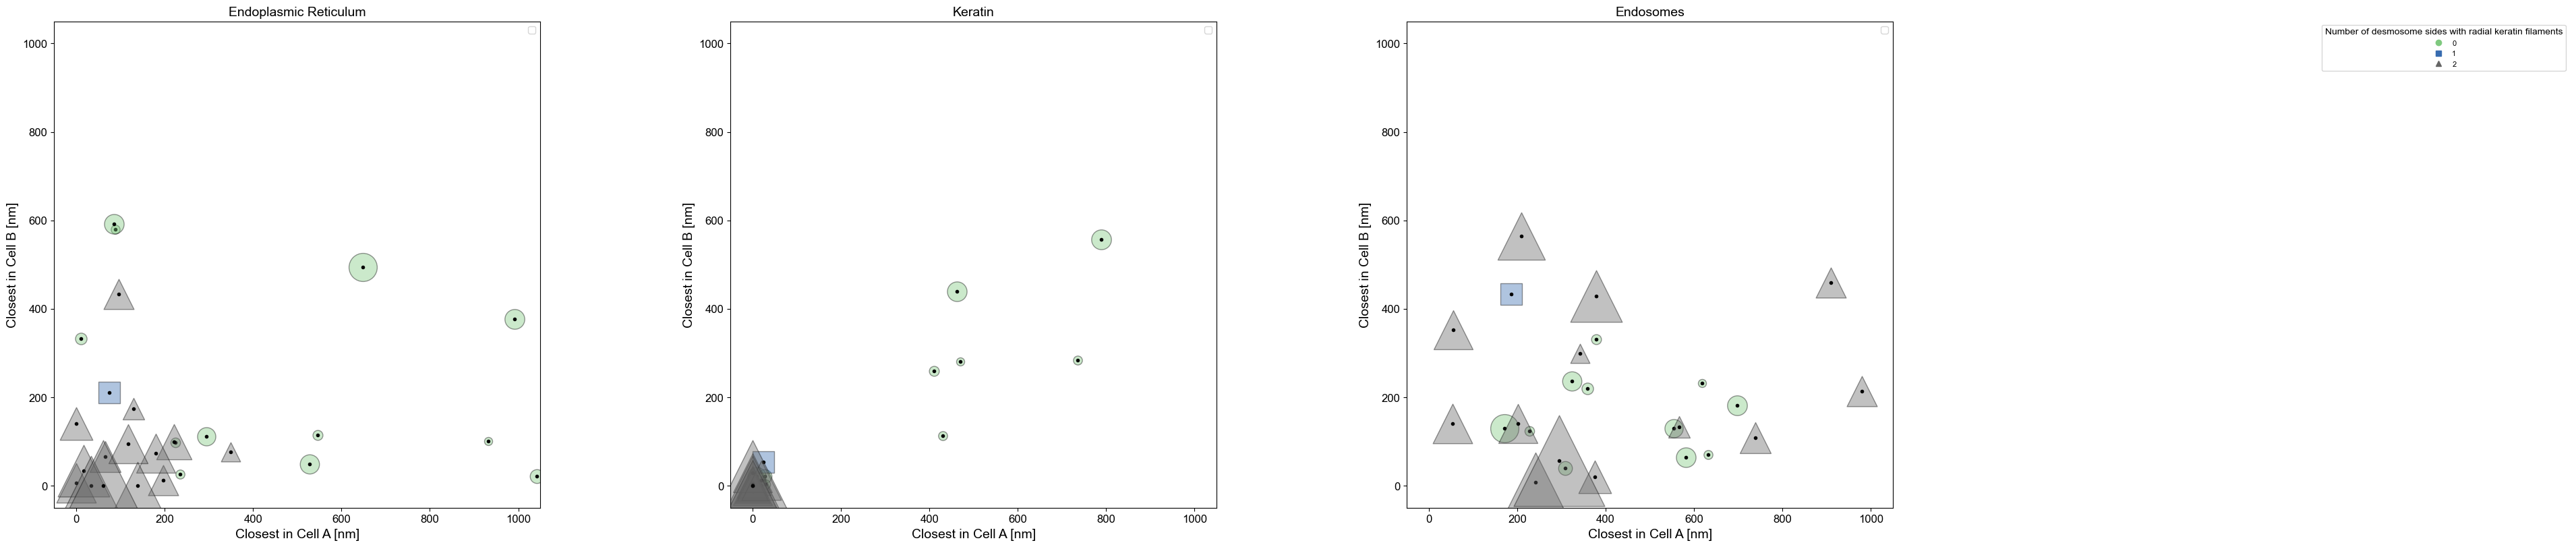

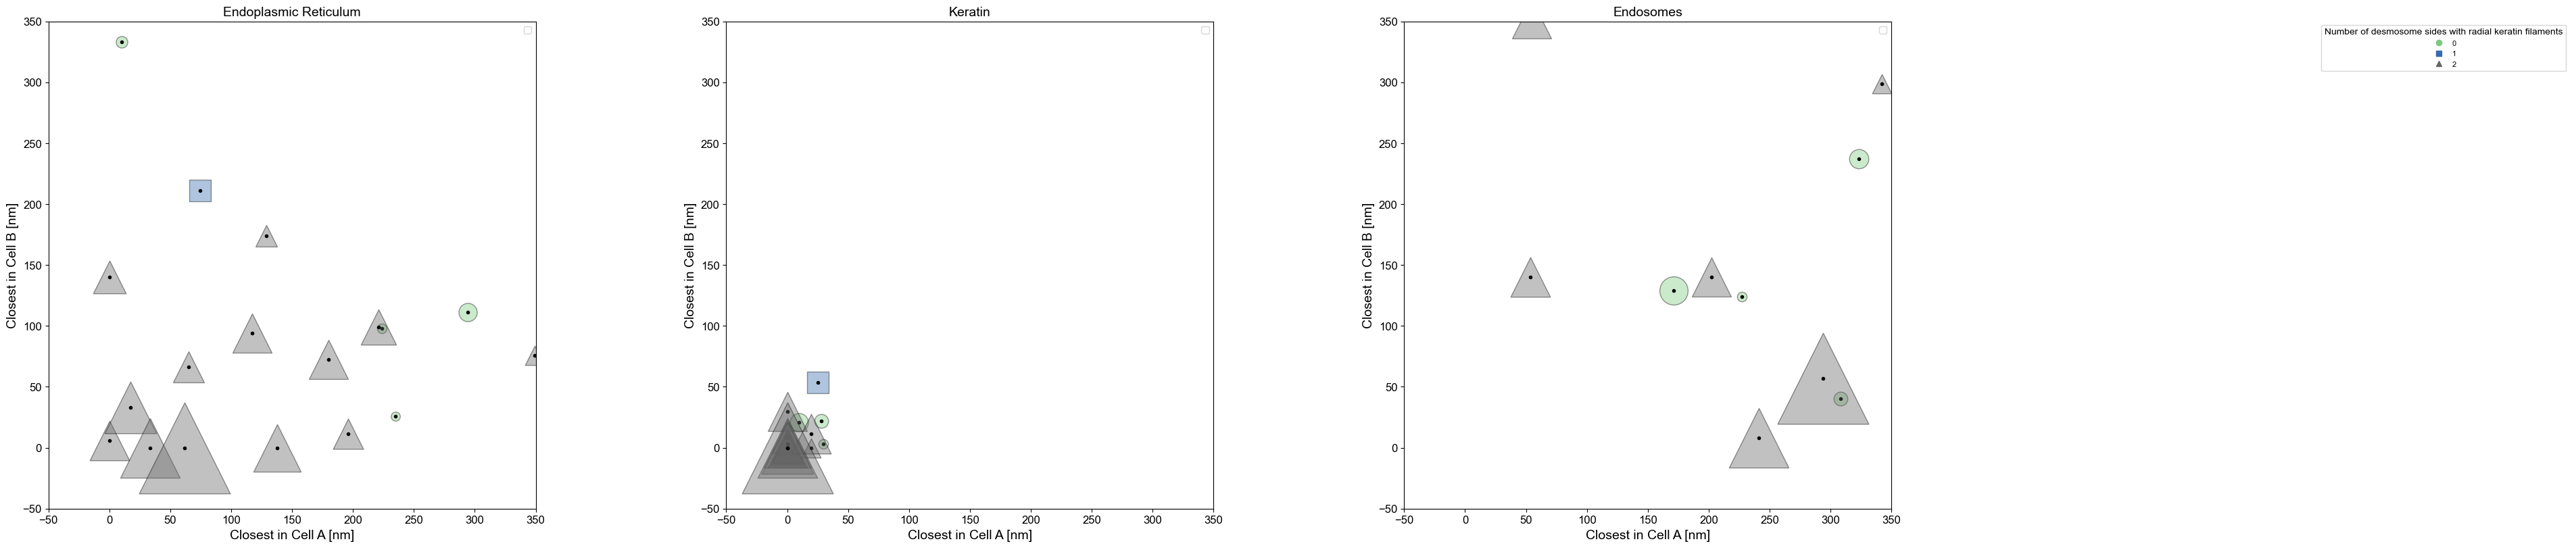

In [5]:
do_it_all(dsm_2_dict)

C:\Users\wgiang\AppData\Local\Temp\ipykernel_31520\3944636448.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap, 3)
C:\Users\wgiang\AppData\Local\Temp\ipykernel_31520\3944636448.py:175: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap, N_colors)
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


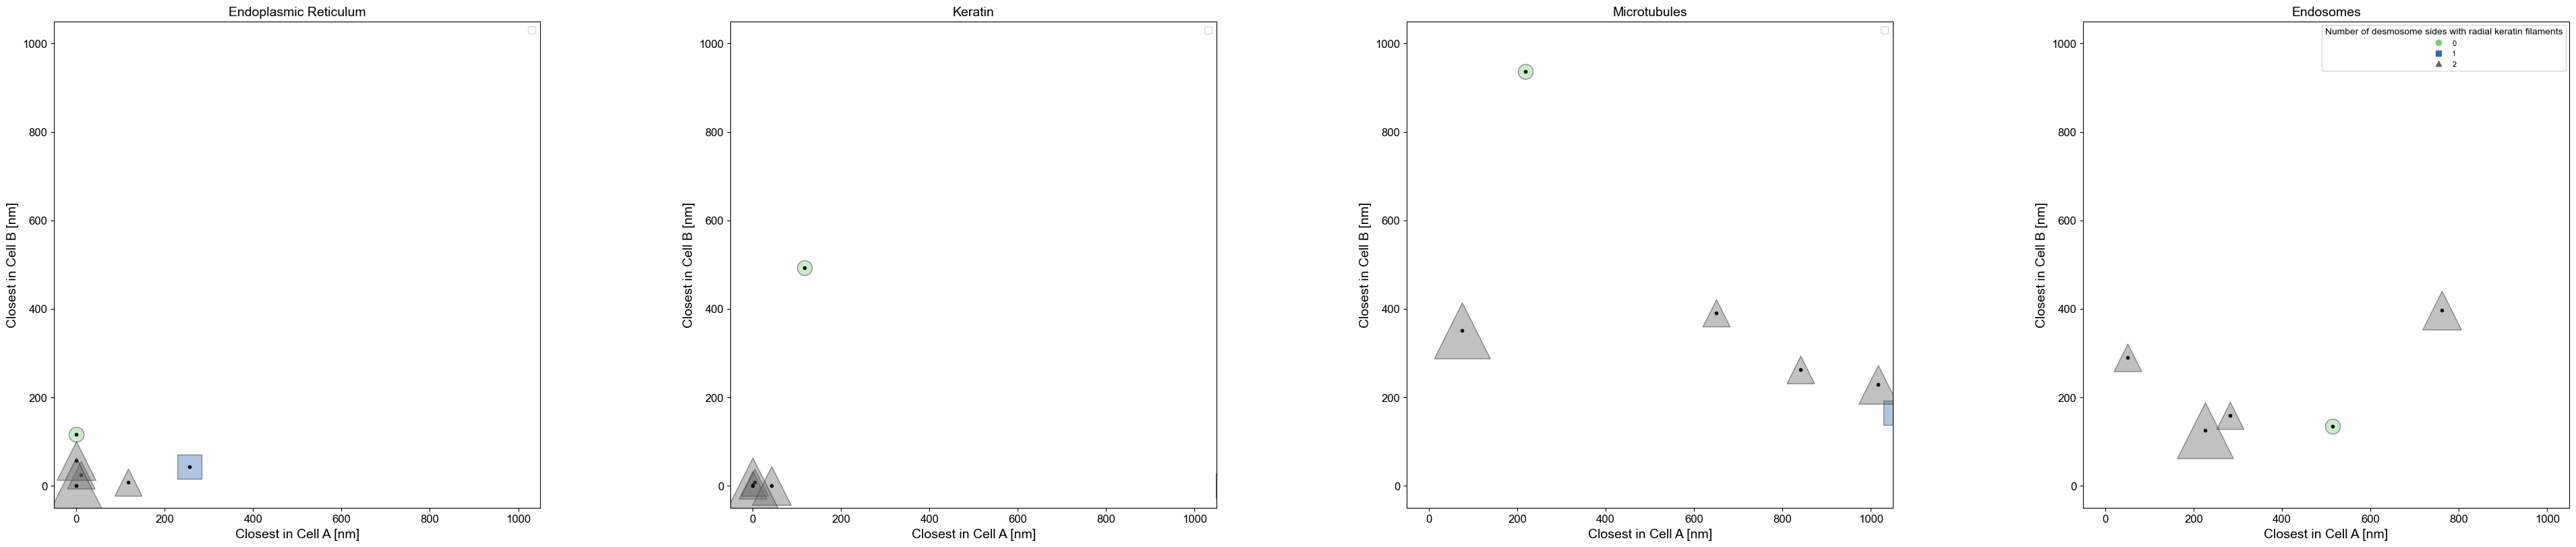

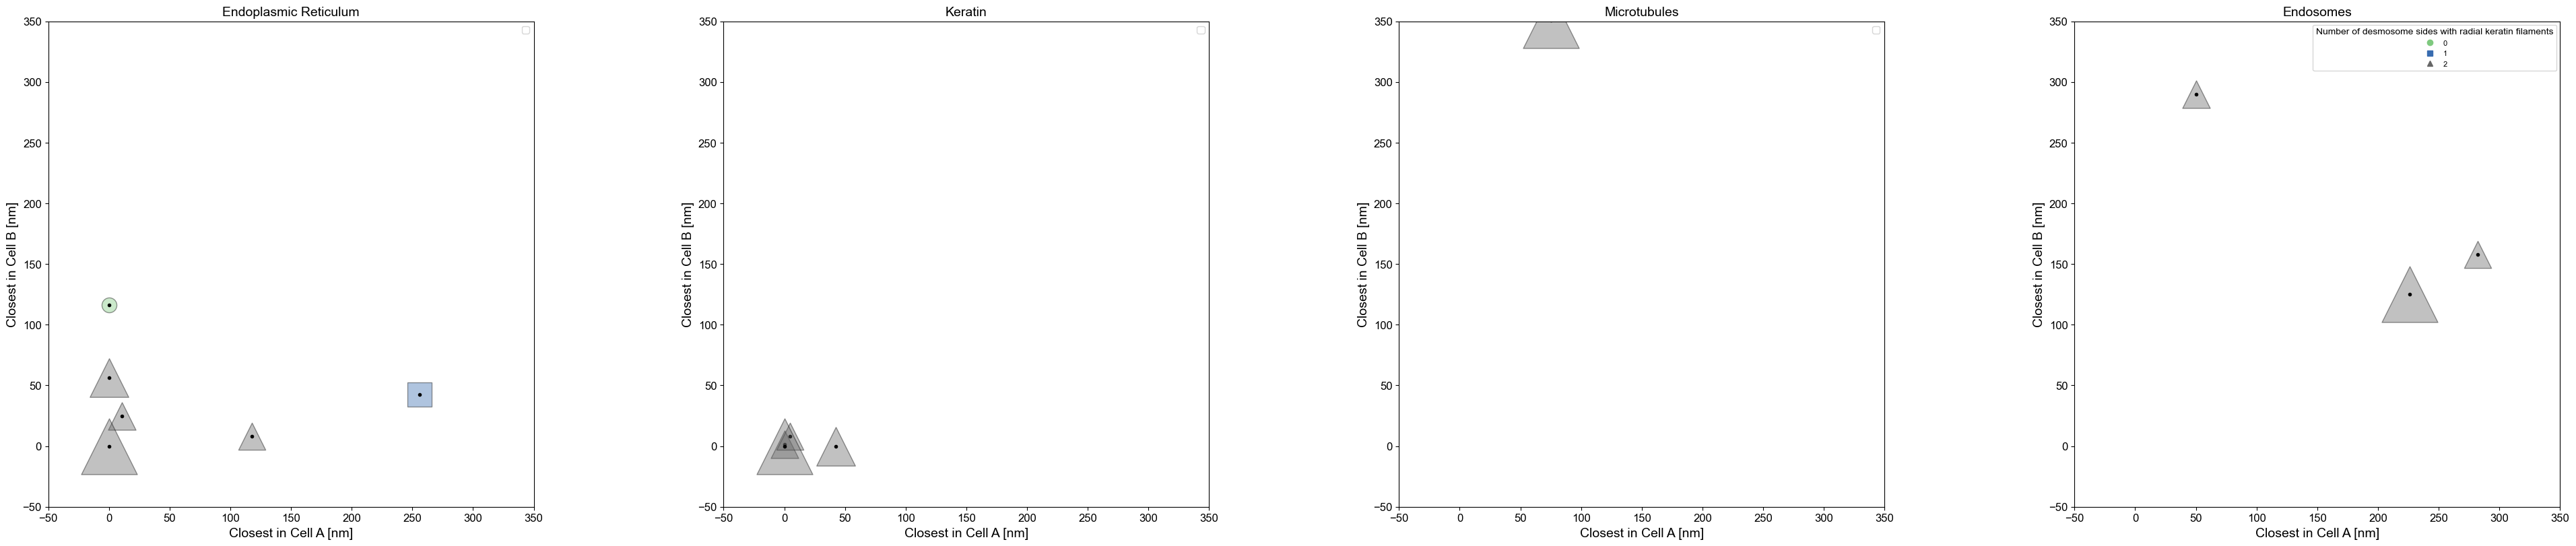

In [6]:
do_it_all(dsm_3_dict)